# Quadrature Rules
In this notebook we're going to set out to examine a couple of quadrature rules i.e. numerical intergration.

In [1]:
import numpy as np

def riemann(f,a,b,N):
    """The simple and not so good Riemann sum approach we know and love to integrate f from a to b with N rectangles"""
    x_i = np.linspace(a,b,N)
    return(sum(f(x_i)*(b-a)/N))

In [2]:
riemann(lambda x: x**2, 0, 1, 100)

0.33501683501683505

Haha! It works! We just demonstrated a Riemann sum to approximate the integral $\int_{0}^{1} x^2 dx$ which is exactly equal to $\frac{1}{3}$

In [3]:
def trapezoids(f,a,b,N):
    """The trapezoid method will vastly improve our approximation by using trapezoid slices instead of rectangles"""
    x_i = np.linspace(a,b,N+1) ## we need one more point because each trapezoid takes two heights
    f_i = f(x_i)
    f_av = np.zeros(N) ## averaged values of f_i for trapezoid rule
    for i in range(0,N):
        f_av[i] = (f_i[i]+f_i[i+1])/2
    return(sum(f_av*(b-a)/N))

In [4]:
trapezoids(lambda x: x**2, 0, 1, 100)

0.33334999999999998

That looks a lot closer to the actual value! But... We can do better! There's a method called Simpson's rule that uses parabolas fitted to three points to approximate the integral, and it should give us an even more accurate answer.

In [5]:
def simpson(f,a,b,N):
    """Simpson's rule rules"""
    if(N%2!=0): ## Simpson's rule works best if N is even
        N+=1
    x_i = np.linspace(a,b,N) ## we need two more points because parabolas are defined by three points
    f_i = f(x_i)
    f_par = []
    for i in range(0,N,2): ## We only want the even indices
        f_par.append((f_i[i-1]+4*f_i[i]+f_i[i+1])/3)
    return(sum(f_par)*(b-a)/N)

In [6]:
simpson(lambda x: x**2, 0, 1, 100)

0.33333333333333343

Well that looks like it's basically exactly what we want! I've also got an entirely different rule that takes all sorts of crazy weights, and it's supposed to be crazy accurate. It's called Chebyshev-Gauss Quadrature. Check it out!

In [7]:
def cg_integrate(f,a,b,N):
    """integrates f using Chebyshev-Gauss Quadrature"""
    xi = np.cos(np.pi*(1-np.linspace(0,1,N+1))) ## [-1,1] Chebyshev points
    wi = np.pi/N*(1-xi**2)**0.5 ## weights
    xi = a+(b-a)*(xi+1.0)/2.0 ## mapping to interval [a,b]
    wi*=(b-a)/2.0 ## adjusting weights to reflect mapped domain
    return(sum(wi*f(xi)))

In [8]:
cg_integrate(lambda x: x**2, 0,1, 100)

0.33329220727536107

Let's use the fact that $\int_{0}^{\pi}\sin(x)dx = 2$ to test all of our quadrature rules for various N.

In [9]:
r_vals=[]
t_vals=[]
s_vals=[]
cg_vals=[]
for i in [2**n for n in range(0,12)]:
    r_vals.append(riemann(lambda x: np.sin(x), 0, np.pi, i))
    t_vals.append(trapezoids(lambda x: np.sin(x), 0, np.pi, i))
    s_vals.append(simpson(lambda x: np.sin(x), 0, np.pi, i))
    cg_vals.append(cg_integrate(lambda x: np.sin(x), 0, np.pi, i))

In [10]:
import matplotlib.pyplot as plt

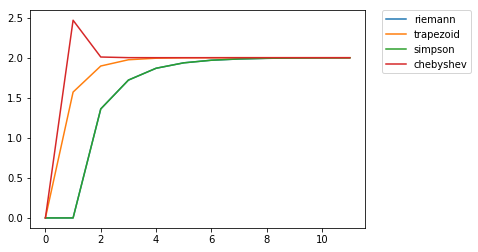

In [11]:
plt.plot(range(0,12),r_vals, label="riemann")
plt.plot(range(0,12),t_vals, label="trapezoid")
plt.plot(range(0,12),s_vals, label="simpson")
plt.plot(range(0,12),cg_vals, label="chebyshev")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can easily tell from this that trapezoid or chebyshev is our best. Curiously, Simpson's method and the Riemann sum are identical.

In [12]:
r_err=[]
t_err=[]
s_err=[]
cg_err=[]
for i in range(5,12):
    r_err.append((r_vals[i]-2)/2)
    t_err.append((t_vals[i]-2)/2)
    s_err.append((s_vals[i]-2)/2)
    cg_err.append((cg_vals[i]-2)/2)

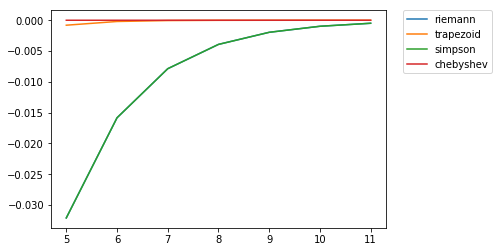

In [13]:
plt.plot(range(5,12),r_err, label="riemann")
plt.plot(range(5,12),t_err, label="trapezoid")
plt.plot(range(5,12),s_err, label="simpson")
plt.plot(range(5,12),cg_err, label="chebyshev")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [14]:
cg_err

[9.5614671602461954e-07,
 5.9708006094894017e-08,
 3.7309488831738236e-09,
 2.3317170416703448e-10,
 1.457389764425443e-11,
 9.1060492479755339e-13,
 5.5067062021407764e-14]

In [15]:
t_err

[-0.00080331951492784714,
 -0.00020080567998126408,
 -5.0199907898673679e-05,
 -1.2549882473456009e-05,
 -3.1374647121440447e-06,
 -7.8436580963625602e-07,
 -1.9609142865029128e-07]

At only 32 divisions Chebyshev-Gauss hit the same order of accuracy that the trapezoid rule hits by N=1024 divsions of the domain. Chebyshev-Gauss is a clear winner!